## 딥러닝 자영어 처리
### 잔연어 처리 (NLP : Natural Language Processing)

- 음성이나 텍스트를 컴퓨터가 인식하고 처리하는 것
    - 컴퓨터를 이용해서 인간의 언어를 알아 듣는 연구는 딥러닝 이전부터 지속
    - 딥러닝이 등장하면서 처리 연구가 활발해짐
    - 대용량 데이터를 이용해 자연어 데이터를 지속적인 입력으로 끊임없이 학습이 가능해짐

### NLP의 전처리
- 텍스트 자료를 딥러닝에 그대로 입력할 수 없음
- 컴퓨터 알고리즘은 수치로 된 데이터만 이해할 뿐 텍스트를 이해할 수 없기 때문
- 의미있는 단어 자체를 수치화시키고 정제하는 전처리 과정 필요

### 텍스트 전처리 작업
1. 토큰화
2. 정제
3. 정규화
4. 어간 추출과 표제어 추출
5. 불용어 제거
6. 정수 인코딩
7. 패딩
8. 원-핫 인코딩

#### 텍스트 토큰화
- 토큰화 : 입력된 텍스트를 잘게 나누는 과정
- 토큰
    - 작게 나누어진 하나의 단위
    - 단어, 문장, 형태소 등

#### 토큰함수
- 케라스의 text_to_word_sequence() 함수
- tensorflow.keras.preprocessing.text

In [1]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [4]:
text = '해보지 않으면 해낼 수 없다'
result = text_to_word_sequence(text)
print(result)

['해보지', '않으면', '해낼', '수', '없다']


#### 단어의 빈도수나 포함 내용 등을 확인 : Tokenizer() 클래스 사용

- 단어의 빈도수
    - 각  단어가 몇 번이나 중복해서 쓰였는지 확인
    - 단어의 빈도수를 알면 텍스트에서 중요한 역할을 하는 단어를 파악할 수 있음

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]

In [7]:
token = Tokenizer() #토큰화 객체 생성
token.fit_on_texts(docs) #문장적용

In [8]:
# 단어의 빈도수 확인 - token.word_counts 속성
token.word_counts
# 각 단어와 빈도수가 튜플로 이루어진 리스트로 반환

OrderedDict([('먼저', 1),
             ('텍스트의', 2),
             ('각', 1),
             ('단어를', 1),
             ('나누어', 1),
             ('토큰화', 3),
             ('합니다', 1),
             ('단어로', 1),
             ('해야', 1),
             ('딥러닝에서', 2),
             ('인식됩니다', 1),
             ('한', 1),
             ('결과는', 1),
             ('사용', 1),
             ('할', 1),
             ('수', 1),
             ('있습니다', 1)])

In [9]:
# 입력받은 데이터의 총 문장 수 : token.document_count
token.document_count

3

In [10]:
# 단어(토큰) 몇개의 문장(document)에 포함되어 있는지 -  토큰이 소속된 문장 수
# token.word_docs
token.word_docs

defaultdict(int,
            {'텍스트의': 2,
             '나누어': 1,
             '단어를': 1,
             '토큰화': 3,
             '먼저': 1,
             '각': 1,
             '합니다': 1,
             '단어로': 1,
             '딥러닝에서': 2,
             '해야': 1,
             '인식됩니다': 1,
             '수': 1,
             '결과는': 1,
             '사용': 1,
             '한': 1,
             '할': 1,
             '있습니다': 1})

#### word_counts와 word_docs
- word_counts : 단어의 빈도수
- word_docs : 몇개의 문장에 나오는가

In [54]:
## 내용 수정 (단어를 추가) 기능 구별을 위해
docs = ['먼저 텍스트의 각 단어를 나누어 단어를 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]

In [55]:
token = Tokenizer() # 토큰화 객체 생성
token.fit_on_texts(docs) # 문장적용

In [56]:
print(token.word_counts)
print('\n',token.word_docs)
# 현재는 word_counts와 word_docs 결과 동일
# 빈도수 : ('단어를', 1)
# 소속 문장 수 : '단어를': 1

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 2), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

 defaultdict(<class 'int'>, {'텍스트의': 2, '나누어': 1, '단어를': 1, '토큰화': 3, '먼저': 1, '각': 1, '합니다': 1, '단어로': 1, '딥러닝에서': 2, '해야': 1, '인식됩니다': 1, '수': 1, '결과는': 1, '사용': 1, '한': 1, '할': 1, '있습니다': 1})


In [57]:
## 위에 내용 그대로 가져오기
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]

token = Tokenizer()            # 토큰화 객체 생성
token.fit_on_texts(docs)       # 문장 적용
print(token.word_counts)
print('\n',token.word_docs)


OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

 defaultdict(<class 'int'>, {'텍스트의': 2, '나누어': 1, '단어를': 1, '토큰화': 3, '먼저': 1, '각': 1, '합니다': 1, '단어로': 1, '딥러닝에서': 2, '해야': 1, '인식됩니다': 1, '수': 1, '결과는': 1, '사용': 1, '한': 1, '할': 1, '있습니다': 1})


#### 각 단어에 매겨진 인덱스 값 확인
- token.word_index

In [58]:
token.word_index
# 각 토큰의 인덱스가 dict 형태로 반환

{'토큰화': 1,
 '텍스트의': 2,
 '딥러닝에서': 3,
 '먼저': 4,
 '각': 5,
 '단어를': 6,
 '나누어': 7,
 '합니다': 8,
 '단어로': 9,
 '해야': 10,
 '인식됩니다': 11,
 '한': 12,
 '결과는': 13,
 '사용': 14,
 '할': 15,
 '수': 16,
 '있습니다': 17}

#### 단어의 원-핫 인코딩
- 먼저 벡터 공간을 0으로 채우고
- index에 해당되는 값만 1로 변경

**원-핫 인코딩 전에 각 단어에 index 부여 수행**


In [59]:
from tensorflow.keras.preprocessing.text import Tokenizer

text = '오랫동안 꿈꾸는 이는 그 꿈을 닮아간다'

token = Tokenizer()            # 토큰화 객체 생성
token.fit_on_texts([text])  
token.word_index  # 각 단어와 인덱스 확인


{'오랫동안': 1, '꿈꾸는': 2, '이는': 3, '그': 4, '꿈을': 5, '닮아간다': 6}

In [60]:
# 각 단어의 index로만 이루어진 리스트 생성
x = token.texts_to_sequences([text])
x

[[1, 2, 3, 4, 5, 6]]

* texts_to_sequences 함수를 이용해 원래 text의 토큰화된 단어들을 배열의 인덱스로 바꿔줄 때

- 예를 들어 위 코드의 경우 text의 단어가6개이니 [1, 2, 3, 4, 5, 6]로 나온다.

- 이 때 0부터 시작하지 않느 이유 :
    - **배열의 맨앞에 인덱스 0이 생략되서 출력** 되는 것임
    - 뒤에 embedding 층을 생성할 때 전체 단어수에 +1을 해야하는 이유


In [61]:
#원-핫 인코딩
#to_categorical() 함수 사용

from tensorflow.keras.utils import to_categorical
word_size = len(token.word_index) + 1
x = to_categorical(x, num_classes=word_size)
x

array([[[0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 1.]]], dtype=float32)

### 원-핫 인코딩의 문제
- 원-핫 인코딩을 그대로 사용하면 벡터의 길이가 너무 길어진다는 단점
- 1만개의 단어 토큰으로 이루어진 말뭉치를 다룬다고 할 때
- 원-핫 인코딩을 적용해서 벡터화할 경우
    - 9999개의 0과 하나의 1로 이루어진 벡터를 1만개를 만들어야함 : 공간적 낭비
    - 단어의 의미가 고려되지 않음

#### 원-핫 인코딩의 대안
- 말뭉치(Corpus)
    - 자연어 연구를 위해 특정 목적을 가지고 언어의 표본을 추출한 집합
- 밀집표현
    - 사용자가 설정한 값으로 모든 단어의 벡터 표현의 차원을 맞춤
    - 이 과정에서 더 이상 0과 1만 가진 값이 아니라 실수값을 가지게 됨  
    - 예:   
        강아지 = [0 0 0 1 ......0] # 10,000 차원  
        밀집 표현으로 변경  
        강아지 = [0.2 1.8 1.1 .... ] # 128차원  
        벡터의 차원이 조밀해졌다고 해서 밀집 벡터(dense bector)라고 함


- 단어 임베딩 (word embedding)
    - 공간적 낭비를 해결하기 위한 방법으로
    - 단어의 의미를 고려하고 밀집 벡터(dense vector)의 형태로 표현 - 유사도계산
    - 의미가 비슷한 단어는 비슷한 방향에 위치
    - 단어의 의미를 효과적으로 표현하기 때문에 
    - 원-핫 인코딩보다 학습 성능을 높일 수 있음
    - 주어진 배열을 정해진 길이로 압축


예 : 단어 happy느 bad 보다 good에 더 가깝고
    cat은 good 보다는 dog에 가깝다는 것을 고려하여
    배열을 새로운 수치로 변경

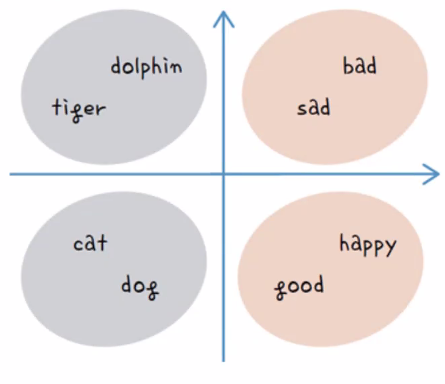

#### 단어 임베딩을 만드는 두가지 방법  

1. (문서 분류나 감성 예측과 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습
    * 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 단어 벡터를 학습함
2. 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드. 이를 사전 훈련된 단어 임베딩이라고 함


#### 케라스의 Embedding 클래스 사용
- Embedding(총 단어수(단어 집합의 크기),임베딩 후 출력되는 벡터 크기,iput_length(각 입력 시퀀스 길이))  
- Embedding(16, 4, input_length=2)  
- **입력될 총 단어수는 16, 임베딩 후 출력되는 벡터크기는 4, 한번에 입력되는 단어는 2개씩만 입력**

#### 임베딩층  
- model = Sequential()  
- model.add(Embedding(word_size, 8, input_length=4))  

#### 단어 → 단어에 부여된 고유한 정수값 → 임베딩 층 통과 → 밀집 벡터  

- 임베딩 층
    - 입력 정수에 대해 밀집 벡터(dense vector)로 맵핑하고 
    - 밀집 벡터는 인공 신경망의 학습 과정에서 가중치가 학습되는 것과 같은 방식으로 훈련
    - 훈련 과정에서 단어는 모델이 풀고자하는 작업에 맞는 값으로 업데이트 됨
    - 그리고 이 밀집 벡터를 임베딩 벡터라고 함

* Embedding 층의 출력 크기  

    - Embedding(16, 4, input_length=2)의 경우  
    - 출력 크기 : (16, 2, 4) : 3D 실수형 텐서를 반환

**Embedding 층의 출력에 대해 Flatten 층 추가**

### 패딩(Padding)
- 문장의 길이를 나타내는 배열의 크기를 동일하게 맞추는 작업
- 길이가 전부 동일한 문서들에 대하여 하나의 행렬로 인식하고
- 한꺼번에 묶어서 처리
- 각 문장(문서)의 길이가 서로 다른 경우 
- 동일한 길이로 맞추로 빈 부분은 0으로 채움


In [62]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = ["지금은 딥러닝을 공부하고 있어요", "어렵지 않고 쉬워요", "참 재미있어요"]
token = Tokenizer()
token.fit_on_texts(sentences)
print(token.word_index) # 단어의 인덱스 출력


{'지금은': 1, '딥러닝을': 2, '공부하고': 3, '있어요': 4, '어렵지': 5, '않고': 6, '쉬워요': 7, '참': 8, '재미있어요': 9}


In [63]:
# 각 문장에 해당되는 인덱스를 배열로 출력
result = token.texts_to_sequences(sentences)
result
# 배열의 길이가 다름


[[1, 2, 3, 4], [5, 6, 7], [8, 9]]

In [66]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 패딩 : 배열의 길이이를 동일하게 맞추는 작업
# 길이를 지정하지 않으면 제일 크기가 큰 배열의 크기에 맞춤
padded = pad_sequences(result)
padded

array([[1, 2, 3, 4],
       [0, 5, 6, 7],
       [0, 0, 8, 9]])

In [70]:
# 길이를 6으로 지정
padded = pad_sequences(result,6)
padded
# padding 파라미터 : 앞부분을 확장할지 뒷부분을 확장할지를 결정
# 기본값 : padding='pre' (앞부분을 0으로 채움)

array([[0, 0, 1, 2, 3, 4],
       [0, 0, 0, 5, 6, 7],
       [0, 0, 0, 0, 8, 9]])

In [69]:
# 길이를 6으로 지정
# 0을 뒤에 출력
padded = pad_sequences(result,6, padding='post')
padded
# padding 파라미터 : 앞부분을 확장할지 뒷부분을 확장할지를 결정
# 기본값 : padding='post' (뒤부분을 0으로 채움)

array([[1, 2, 3, 4, 0, 0],
       [5, 6, 7, 0, 0, 0],
       [8, 9, 0, 0, 0, 0]])

### 자연어 처리 예제 (embedding 사용)
- 텍스트를 일고 긍정, 부정 예측하기
    - 영화 리뷰를 딥러닝 모델로 학습해서
    - 각 라뷰가 긍정적인지 부정적인지 예측



- 예측 과정  
1. 짧은 리뷰 10개를 불러와  
    - 긍정적이면 1, 부정적이면 0이라는 클래스로 지정    
2. 토큰화  
3. 패딩 (padding)   
4. 임베딩 및 딥러닝


In [71]:
import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [74]:
# (1) 데이터 준비
# - 긍정적이면 1, 부정적이면 0이라는 클래스로 지정

docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요", \
        "추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요", \
        "별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스 지정
classes = array([1,1,1,1,1,0,0,0,0,0])




리뷰 텍스트, 토큰화 결과:
 [[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [75]:
# (2) 토큰화
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)
x=token.texts_to_sequences(docs)

print("\n리뷰 텍스트, 토큰화 결과:\n",  x)


{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]


In [76]:
# (3) 패딩(padding) : 서로 다른 길이의 데이터를 4로 맞춤
padded_x = pad_sequences(x,4)
print("\n패딩 결과:\n", padded_x)


패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]


In [77]:
token.word_index

{'너무': 1,
 '재밌네요': 2,
 '최고예요': 3,
 '참': 4,
 '잘': 5,
 '만든': 6,
 '영화예요': 7,
 '추천하고': 8,
 '싶은': 9,
 '영화입니다': 10,
 '한번': 11,
 '더': 12,
 '보고싶네요': 13,
 '글쎄요': 14,
 '별로예요': 15,
 '생각보다': 16,
 '지루하네요': 17,
 '연기가': 18,
 '어색해요': 19,
 '재미없어요': 20}

In [80]:
### 딥러닝 모델 설정 - embedding 시 전체 단어수 계산
word_size = len(token.word_index) + 1
#**배열의 맨앞에 dlseprtm 0이 생략되어 출력** 됨
# embedding 시 전체 단어수에 +1을 해야함

In [81]:
word_size

21

In [83]:
# (1) 모델 설정
model=Sequential()
model.add(Embedding(word_size, 8, input_length=4)) # 3D 텐서 반환
model.add(Flatten()) # 층변환
model.add(Dense(1, activation='sigmoid')) # 출력층

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              168       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [85]:
# (2) 모델 컴파일
model.compile(optimizer='adam',  # adam rmsprop
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [86]:
# (3) 모델 훈련(학습) : paddes_x-> token분리후 padding한 데이터
model.fit(padded_x, classes, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 372ms/step - loss: 0.6980 - accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 997us/step - loss: 0.6935 - accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 0s 998us/step - loss: 0.6913 - accuracy: 0.6000
Epoch 5/20
1/1 [==============================] - 0s 996us/step - loss: 0.6890 - accuracy: 0.6000
Epoch 6/20
1/1 [==============================] - 0s 997us/step - loss: 0.6868 - accuracy: 0.7000
Epoch 7/20
1/1 [==============================] - 0s 2ms/step - loss: 0.6846 - accuracy: 0.7000
Epoch 8/20
1/1 [==============================] - 0s 997us/step - loss: 0.6824 - accuracy: 0.7000
Epoch 9/20
1/1 [==============================] - 0s 998us/step - loss: 0.6802 - accuracy: 0.7000
Epoch 10/20
1/1 [==============================] - 0s 997us/step - loss: 0.6780 - accuracy: 0.8000
Epoch 11/20
1/1 [======

In [87]:
# (4) 모델 평가
print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))


1/1 [==============================] - 0s 80ms/step - loss: 0.6539 - accuracy: 0.9000

 Accuracy: 0.9000


## 05_영화리뷰 이진분류 예제를 embedding 방식으로 진행

In [109]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 특성으로 사용할 단어의 수
max_features = 10000
# 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용합니다)
maxlen = 20

# 정수 리스트로 데이터를 로드합니다.
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

## word_index 인덱스 작업까지 완료 상태

In [110]:
# padding 작업 진행
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [111]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen)) # 이미 전처리 완료된 상태라서 +1 필요없음
# Embedding 층의 출력 크기는 (samples, maxlen, 8)가 됩니다.
model.add(Flatten()) # 층을 펼침
# 분류기 추가
model.add(Dense(1, activation='sigmoid')) # 출력층

In [112]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [113]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1s 606us/step - loss: 0.6598 - acc: 0.6399 - val_loss: 0.5959 - val_acc: 0.7076
Epoch 2/10
625/625 [==============================] - 0s 500us/step - loss: 0.5237 - acc: 0.7543 - val_loss: 0.5131 - val_acc: 0.7396
Epoch 3/10
625/625 [==============================] - 0s 505us/step - loss: 0.4546 - acc: 0.7903 - val_loss: 0.4937 - val_acc: 0.7480
Epoch 4/10
625/625 [==============================] - 0s 507us/step - loss: 0.4223 - acc: 0.8067 - val_loss: 0.4906 - val_acc: 0.7520
Epoch 5/10
625/625 [==============================] - 0s 507us/step - loss: 0.4008 - acc: 0.8189 - val_loss: 0.4915 - val_acc: 0.7552
Epoch 6/10
625/625 [==============================] - 0s 496us/step - loss: 0.3836 - acc: 0.8293 - val_loss: 0.4943 - val_acc: 0.7614
Epoch 7/10
625/625 [==============================] - 0s 494us/step - loss: 0.3683 - acc: 0.8393 - val_loss: 0.5003 - val_acc: 0.7592
Epoch 8/10
625/625 [==============================] - 0s 489us

### 결과
- 20개 단어만 사용한 것 치고는 꽤 좋은 결과임
- 단어 사이의 관계나 문장구조를 고려하고 있지 않음
- 각 시퀀스 전체를 고려한 특성을 학습하도록 임베딩 층위에 순환층을 추가하는 것이 좋음

### 사전 훈련된 단어 임베딩 사용하기
- 훈련 데이터가 부족하면 작업에 맞는 단어 임베딩을 학습할 수 없음
    - 미리 계산된 임베딩 공간에서 임베딩 벡터를 로드해 사용
    - 꽤 일반적인 특성이 필요할 때 다른 문제에서 사용한 특성을 재사용할 수 있음

- 케라스의 `Embedding` 층을 위해 내려받을 수 있는 미리 계산된 단어 임베딩 데이터베이스가 여럿 있음
    - **Word2vec**은 대표적인 계산된 임베딩임 
    - GloVe(Global Vectors for Word Representation): 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용함
        - 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만 개의 영어 토큰에 대해서 임베딩을 미리 계산해 놓았음


### 영화 리뷰 예제에 사전 훈련된 단어 임베딩 사용하기

- 원본 텍스트 다운로딩해서 처음부터 작업

- 원본 IMDB 텍스트 다운로드하기
- 먼저 http://mng.bz/0tIo 에서 IMDB 원본 데이터셋을 다운로드하고 압축을 해제

- 훈련용 리뷰 하나를 문자열 하나로 만들어 훈련 데이터를 문자열의 리스트로 구성/리뷰 레이블(긍정/부정)도 labels 리스트로 생성


In [101]:
import os

imdb_dir = './data/aclImdb'